In [1]:
import seaborn as sns
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [35]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import export_text

In [36]:
from sklearn import tree

In [37]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
X = iris.data[:,:2]
y = iris.target

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [42]:
print('Accuracy of test:',accuracy_score(y_test,y_pred))
print('Accuracy of train:',accuracy_score(y_train,y_pred_train))

Accuracy of test: 0.6333333333333333
Accuracy of train: 0.9416666666666667


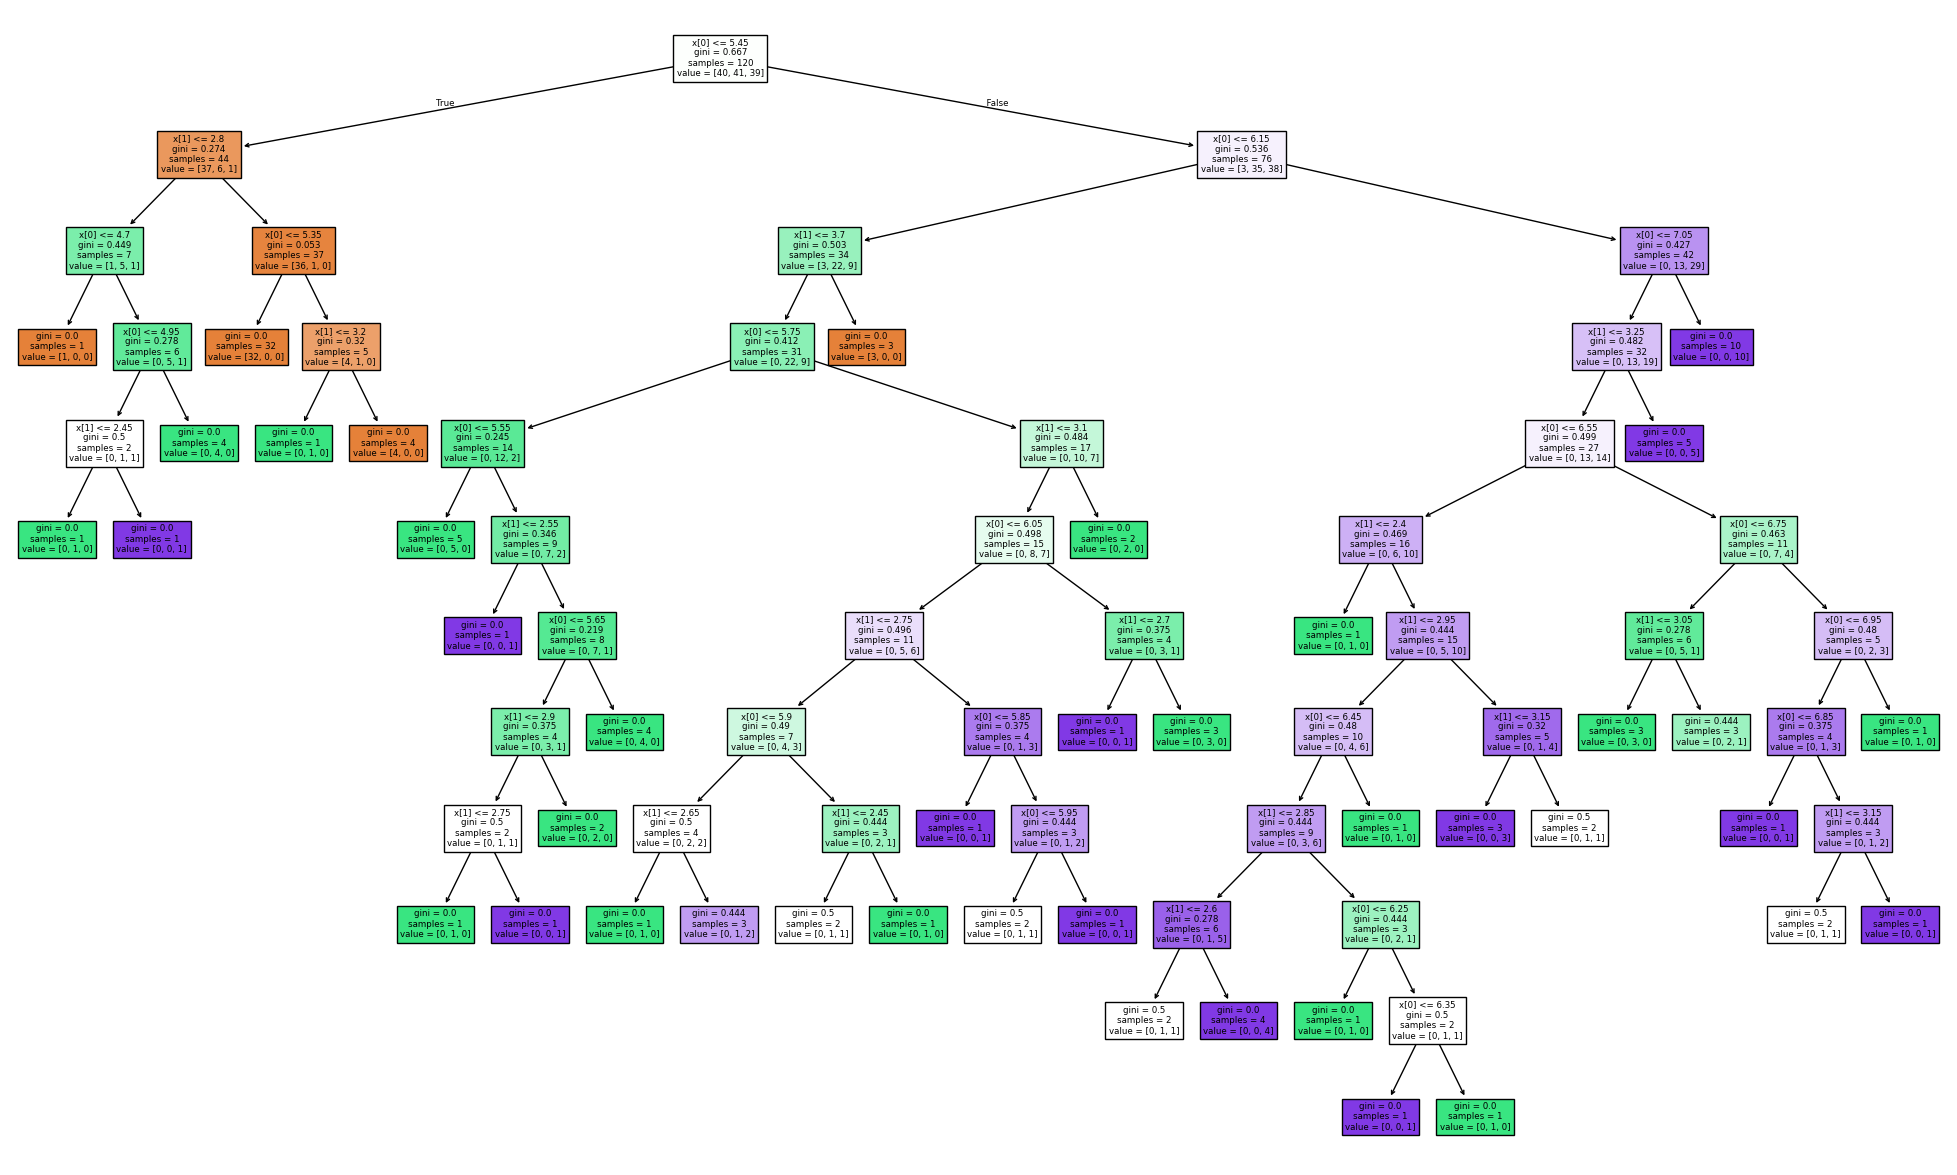

In [43]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf,filled=True)
plt.show()

# Hyper Parameter tuninh

In [44]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8],   # ✅ fixed spelling
    'max_leaf_nodes': [1,2,3,4,5,6,7,8],
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'random_state': [0,42]
}


In [45]:
8*7*8*2*2*2*5

17920

In [46]:
import time

In [47]:
grid_search = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1)

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [51]:
b = grid_search.best_params_
b

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'best'}

In [52]:
dtree = DecisionTreeClassifier(**b)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=0)

In [53]:
y_pred = dtree.predict(X_test)
y_pred_train = dtree.predict(X_train)

In [57]:
print('Accuracy of test:',accuracy_score(y_test,y_pred))
print('Accuracy of train:',accuracy_score(y_train,y_pred_train))

Accuracy of test: 0.8333333333333334
Accuracy of train: 0.7916666666666666
